# Analiza podatkov s pandas

Povzeto po [https://github.com/matijapretnar/programiranje-1/tree/master/03-knjiznica-pandas](https://github.com/matijapretnar/programiranje-1/tree/master/03-knjiznica-pandas).

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/analiza-filmov.ipynb)


### Naložimo pandas in podatke

In [4]:
# naložimo paket # doma v terminal (lahko ta) pip install pandas in pa pip install matplotlib
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option('display.max_rows', 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
FILMI = pd.read_csv('filmi.csv', index_col='id')

Poglejmo si podatke.

In [5]:
FILMI

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.2,NaN,24890,10000000.0,TV-PG,The Stoneman family finds its friendship with ...
6864,Intolerance,197,1916,7.7,99.0,15670,2180000.0,Passed,The story of a poor young woman separated by p...
9968,Broken Blossoms,90,1919,7.3,NaN,10423,NaN,Not Rated,"A frail waif, abused by her brutal boxer fathe..."
10323,The Cabinet of Dr. Caligari,67,1920,8.0,NaN,64133,NaN,Not Rated,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
12349,The Kid,68,1921,8.3,NaN,126513,5450000.0,Passed,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...
18568902,Kaun Pravin Tambe?,134,2022,8.4,NaN,10163,NaN,NaN,An indian cricketer who shows persistence and ...
18689424,Batman v Superman: Dawn of Justice - Ultimate ...,182,2016,7.1,NaN,57662,NaN,R,Batman is manipulated by Lex Luthor to fear Su...
18968540,Incantation,110,2022,6.2,NaN,12366,NaN,TV-MA,"Six years ago, Li Ronan was cursed after break..."


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [11]:
FILMI.sort_values('ocena', ascending=False, inplace=True)

Poberite stolpec ocen.

In [15]:
FILMI['ocena']

id
15327088    9.4
111161      9.3
252487      9.2
68646       9.2
108052      9.0
           ... 
421051      1.2
6038600     1.2
7886848     1.1
5988370     1.0
7221896     1.0
Name: ocena, Length: 9999, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [14]:
print(type(FILMI['ocena'])) # za vrivanje v druge razpredelnice, vektorska oblika
print(type(FILMI[['ocena']])) # nova razpredelnica

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()` in dobljeni `Series` shranite v `zaokrozena_ocena`.

In [20]:
zaokrozene_ocene = FILMI['ocena'].apply(round) # cela števila
zaokrozene_ocene

id
15327088    9
111161      9
252487      9
68646       9
108052      9
           ..
421051      1
6038600     1
7886848     1
5988370     1
7221896     1
Name: ocena, Length: 9999, dtype: int64

Dodajte zaokrožene vrednosti v podatke.

In [22]:
FILMI['zaokrožena ocena'] = zaokrozene_ocene
FILMI

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrožena ocena
id,,,,,,,,,,
15327088,Kantara,148,2022,9.4,NaN,33294,NaN,NaN,It involves culture of Kambla and Bhootha Kola...,9
111161,The Shawshank Redemption,142,1994,9.3,81.0,2651625,28341469.0,R,Two imprisoned men bond over a number of years...,9
252487,The Chaos Class,87,1975,9.2,NaN,40747,NaN,NaN,"Lazy, uneducated students share a very close b...",9
68646,The Godfather,175,1972,9.2,100.0,1838099,134966411.0,R,The aging patriarch of an organized crime dyna...,9
108052,Schindler's List,195,1993,9.0,94.0,1343684,96898818.0,R,"In German-occupied Poland during World War II,...",9
...,...,...,...,...,...,...,...,...,...,...
421051,Daniel the Wizard,81,2004,1.2,NaN,14413,NaN,Not Rated,"Evil assassins want to kill Daniel Kublbock, t...",1
6038600,Smolensk,120,2016,1.2,NaN,39704,NaN,NaN,An inspired story of people affected by the tr...,1
7886848,Sadak 2,133,2020,1.1,NaN,95865,NaN,TV-MA,"The film picks up where Sadak left off, revolv...",1


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [24]:
FILMI.drop(columns=['zaokrožena ocena'], inplace=True)
FILMI

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
15327088,Kantara,148,2022,9.4,NaN,33294,NaN,NaN,It involves culture of Kambla and Bhootha Kola...
111161,The Shawshank Redemption,142,1994,9.3,81.0,2651625,28341469.0,R,Two imprisoned men bond over a number of years...
252487,The Chaos Class,87,1975,9.2,NaN,40747,NaN,NaN,"Lazy, uneducated students share a very close b..."
68646,The Godfather,175,1972,9.2,100.0,1838099,134966411.0,R,The aging patriarch of an organized crime dyna...
108052,Schindler's List,195,1993,9.0,94.0,1343684,96898818.0,R,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...,...,...
421051,Daniel the Wizard,81,2004,1.2,NaN,14413,NaN,Not Rated,"Evil assassins want to kill Daniel Kublbock, t..."
6038600,Smolensk,120,2016,1.2,NaN,39704,NaN,NaN,An inspired story of people affected by the tr...
7886848,Sadak 2,133,2020,1.1,NaN,95865,NaN,TV-MA,"The film picks up where Sadak left off, revolv..."


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [27]:
poenostavljena_tabela = FILMI[['naslov', 'leto', 'glasovi']].copy()
poenostavljena_tabela['zaokrožena ocena'] = zaokrozene_ocene
poenostavljena_tabela

,naslov,leto,glasovi,zaokrožena ocena
id,,,,
15327088,Kantara,2022,33294,9
111161,The Shawshank Redemption,1994,2651625,9
252487,The Chaos Class,1975,40747,9
68646,The Godfather,1972,1838099,9
108052,Schindler's List,1993,1343684,9
...,...,...,...,...
421051,Daniel the Wizard,2004,14413,1
6038600,Smolensk,2016,39704,1
7886848,Sadak 2,2020,95865,1


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [29]:
filter_pred_1930 = FILMI['leto'] < 1930
filter_po_2017 = FILMI['leto'] > 2017
FILMI[filter_pred_1930 | filter_po_2017]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
15327088,Kantara,148,2022,9.4,NaN,33294,NaN,NaN,It involves culture of Kambla and Bhootha Kola...
16492678,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,87,2021,9.0,NaN,12634,NaN,NaN,Tanjiro ventures to the south-southeast where ...
7466810,777 Charlie,164,2022,8.9,NaN,26856,NaN,NaN,Dharma is stuck in a rut with his negative and...
9263550,Rocketry: The Nambi Effect,157,2022,8.9,NaN,47460,NaN,NaN,Based on the life of Indian Space Research Org...
15097216,Jai Bhim,164,2021,8.9,NaN,199511,NaN,TV-MA,When a tribal man is arrested for a case of al...
...,...,...,...,...,...,...,...,...,...
10888594,Radhe,135,2021,1.9,NaN,177814,NaN,TV-MA,"After taking the dreaded gangster Gani Bhai, A..."
5013984,Gully,84,2019,1.9,NaN,18826,NaN,R,"Three teens living in LA, all victims of extre..."
8402090,Cumali Ceber 2,100,2018,1.7,NaN,10791,NaN,NaN,Cumali Ceber learns about the demolition of th...


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni, krajšimi od dveh besed in oceno nad 8.

In [30]:
def najvec_dve_besedi(niz):
    return len(niz.split()) <= 2

filter = FILMI['naslov'].apply(najvec_dve_besedi) & (FILMI['ocena'] > 8) # operacija in je močnejša / ima prednost pred >
FILMI[filter]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
15327088,Kantara,148,2022,9.4,NaN,33294,NaN,NaN,It involves culture of Kambla and Bhootha Kola...
68646,The Godfather,175,1972,9.2,100.0,1838099,134966411.0,R,The aging patriarch of an organized crime dyna...
108052,Schindler's List,195,1993,9.0,94.0,1343684,96898818.0,R,"In German-occupied Poland during World War II,..."
5354160,Mirror Game,147,2016,9.0,NaN,27034,NaN,NaN,Ayna is an actor and the prison is his stage. ...
253828,Tosun Pasa,90,1976,8.9,NaN,23406,NaN,NaN,Late 19th century in Alexandria. Two tradition...
...,...,...,...,...,...,...,...,...,...
453729,Iqbal,132,2005,8.1,NaN,17087,NaN,Not Rated,"Iqbal, the deaf and mute son of a farmer, has ..."
75148,Rocky,120,1976,8.1,70.0,572394,117235247.0,PG,A small-time Philadelphia boxer gets a supreme...
60107,Andrei Rublev,205,1966,8.1,NaN,53798,102021.0,R,"The life, times and afflictions of the fifteen..."


### Manjkajoče vrednosti

Koliko filmov ima neznan zaslužek? Koliko filmov ima znan zaslužek?

In [32]:
filter_manjkajoci = FILMI['zasluzek'].isna()
filter_prisotni1 = FILMI['zasluzek'].notna()
filter_prisotni2 = ~filter_manjkajoci

n_manjkajoci = sum(filter_manjkajoci)
n_prisotni1 = sum(filter_prisotni1)
n_prisotni2 = sum(filter_prisotni2)
n_prisotni3 = len(FILMI) - n_manjkajoci

print(n_manjkajoci, n_prisotni1, n_prisotni2, n_prisotni3)

2741 7258 7258 7258


### Histogrami

Združite filme po (zaokroženih) ocenah in jih preštejte.

In [34]:
po_ocenah = poenostavljena_tabela.groupby('zaokrožena ocena').size()
po_ocenah

zaokrožena ocena
1       7
2      33
3      55
4     223
5     856
6    3274
7    3554
8    1932
9      65
dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='zaokrožena ocena'>

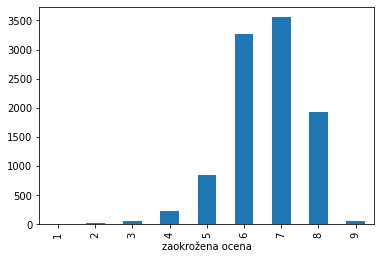

In [35]:
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<AxesSubplot:title={'center':'leto'}>,
        <AxesSubplot:title={'center':'glasovi'}>],
       [<AxesSubplot:title={'center':'zaokrožena ocena'}>,
        <AxesSubplot:>]], dtype=object)

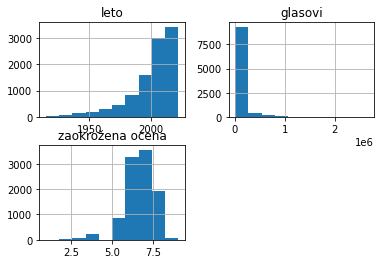

In [36]:
poenostavljena_tabela.hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto', ylabel='povprečna dolžina v minutah'>

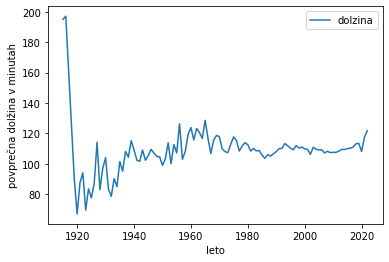

In [39]:
FILMI[['leto', 'dolzina']].groupby('leto').mean().plot(ylabel='povprečna dolžina v minutah')

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto', ylabel='skupni zaslužek vseh filmov z danim letom izida'>

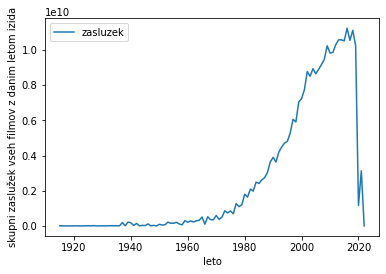

In [40]:
FILMI[['leto', 'zasluzek']].groupby('leto').sum().plot(ylabel='skupni zaslužek vseh filmov z danim letom izida')